In [1]:
# !wget https://media.roboflow.com/notebooks/examples/dog.jpeg

In [1]:
import torch

torch.cuda.is_available(), torch.version.cuda

(True, '11.8')

In [2]:
!nvidia-smi

Wed Oct  1 07:01:54 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   86C    P0              49W /  80W |  12516MiB / 16384MiB |     14%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

/home/ai-17/Documents/CS_Detection


100%|██████████| 51.4M/51.4M [00:06<00:00, 7.84MB/s]


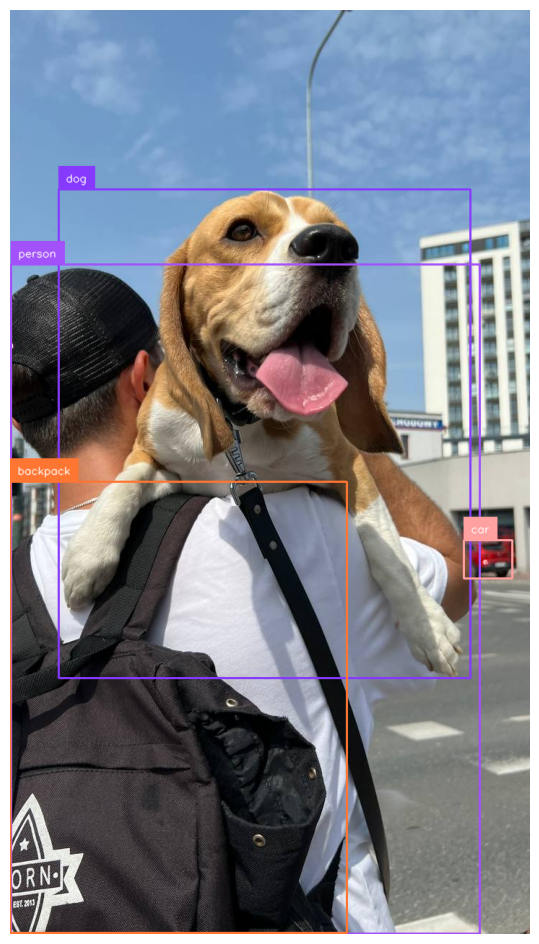

In [3]:

import cv2
from ultralytics import YOLO
import supervision as sv


import os
HOME = os.getcwd()
print(HOME)

image_path = f"{HOME}/dog.jpeg"
image = cv2.imread(image_path)

model = YOLO('yolov12l.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [1]:

from ultralytics import YOLO

model = YOLO('yolov12n.pt')

results = model.train(data=f'data.yaml', epochs=100)


Ultralytics 8.3.204 🚀 Python-3.9.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16117MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

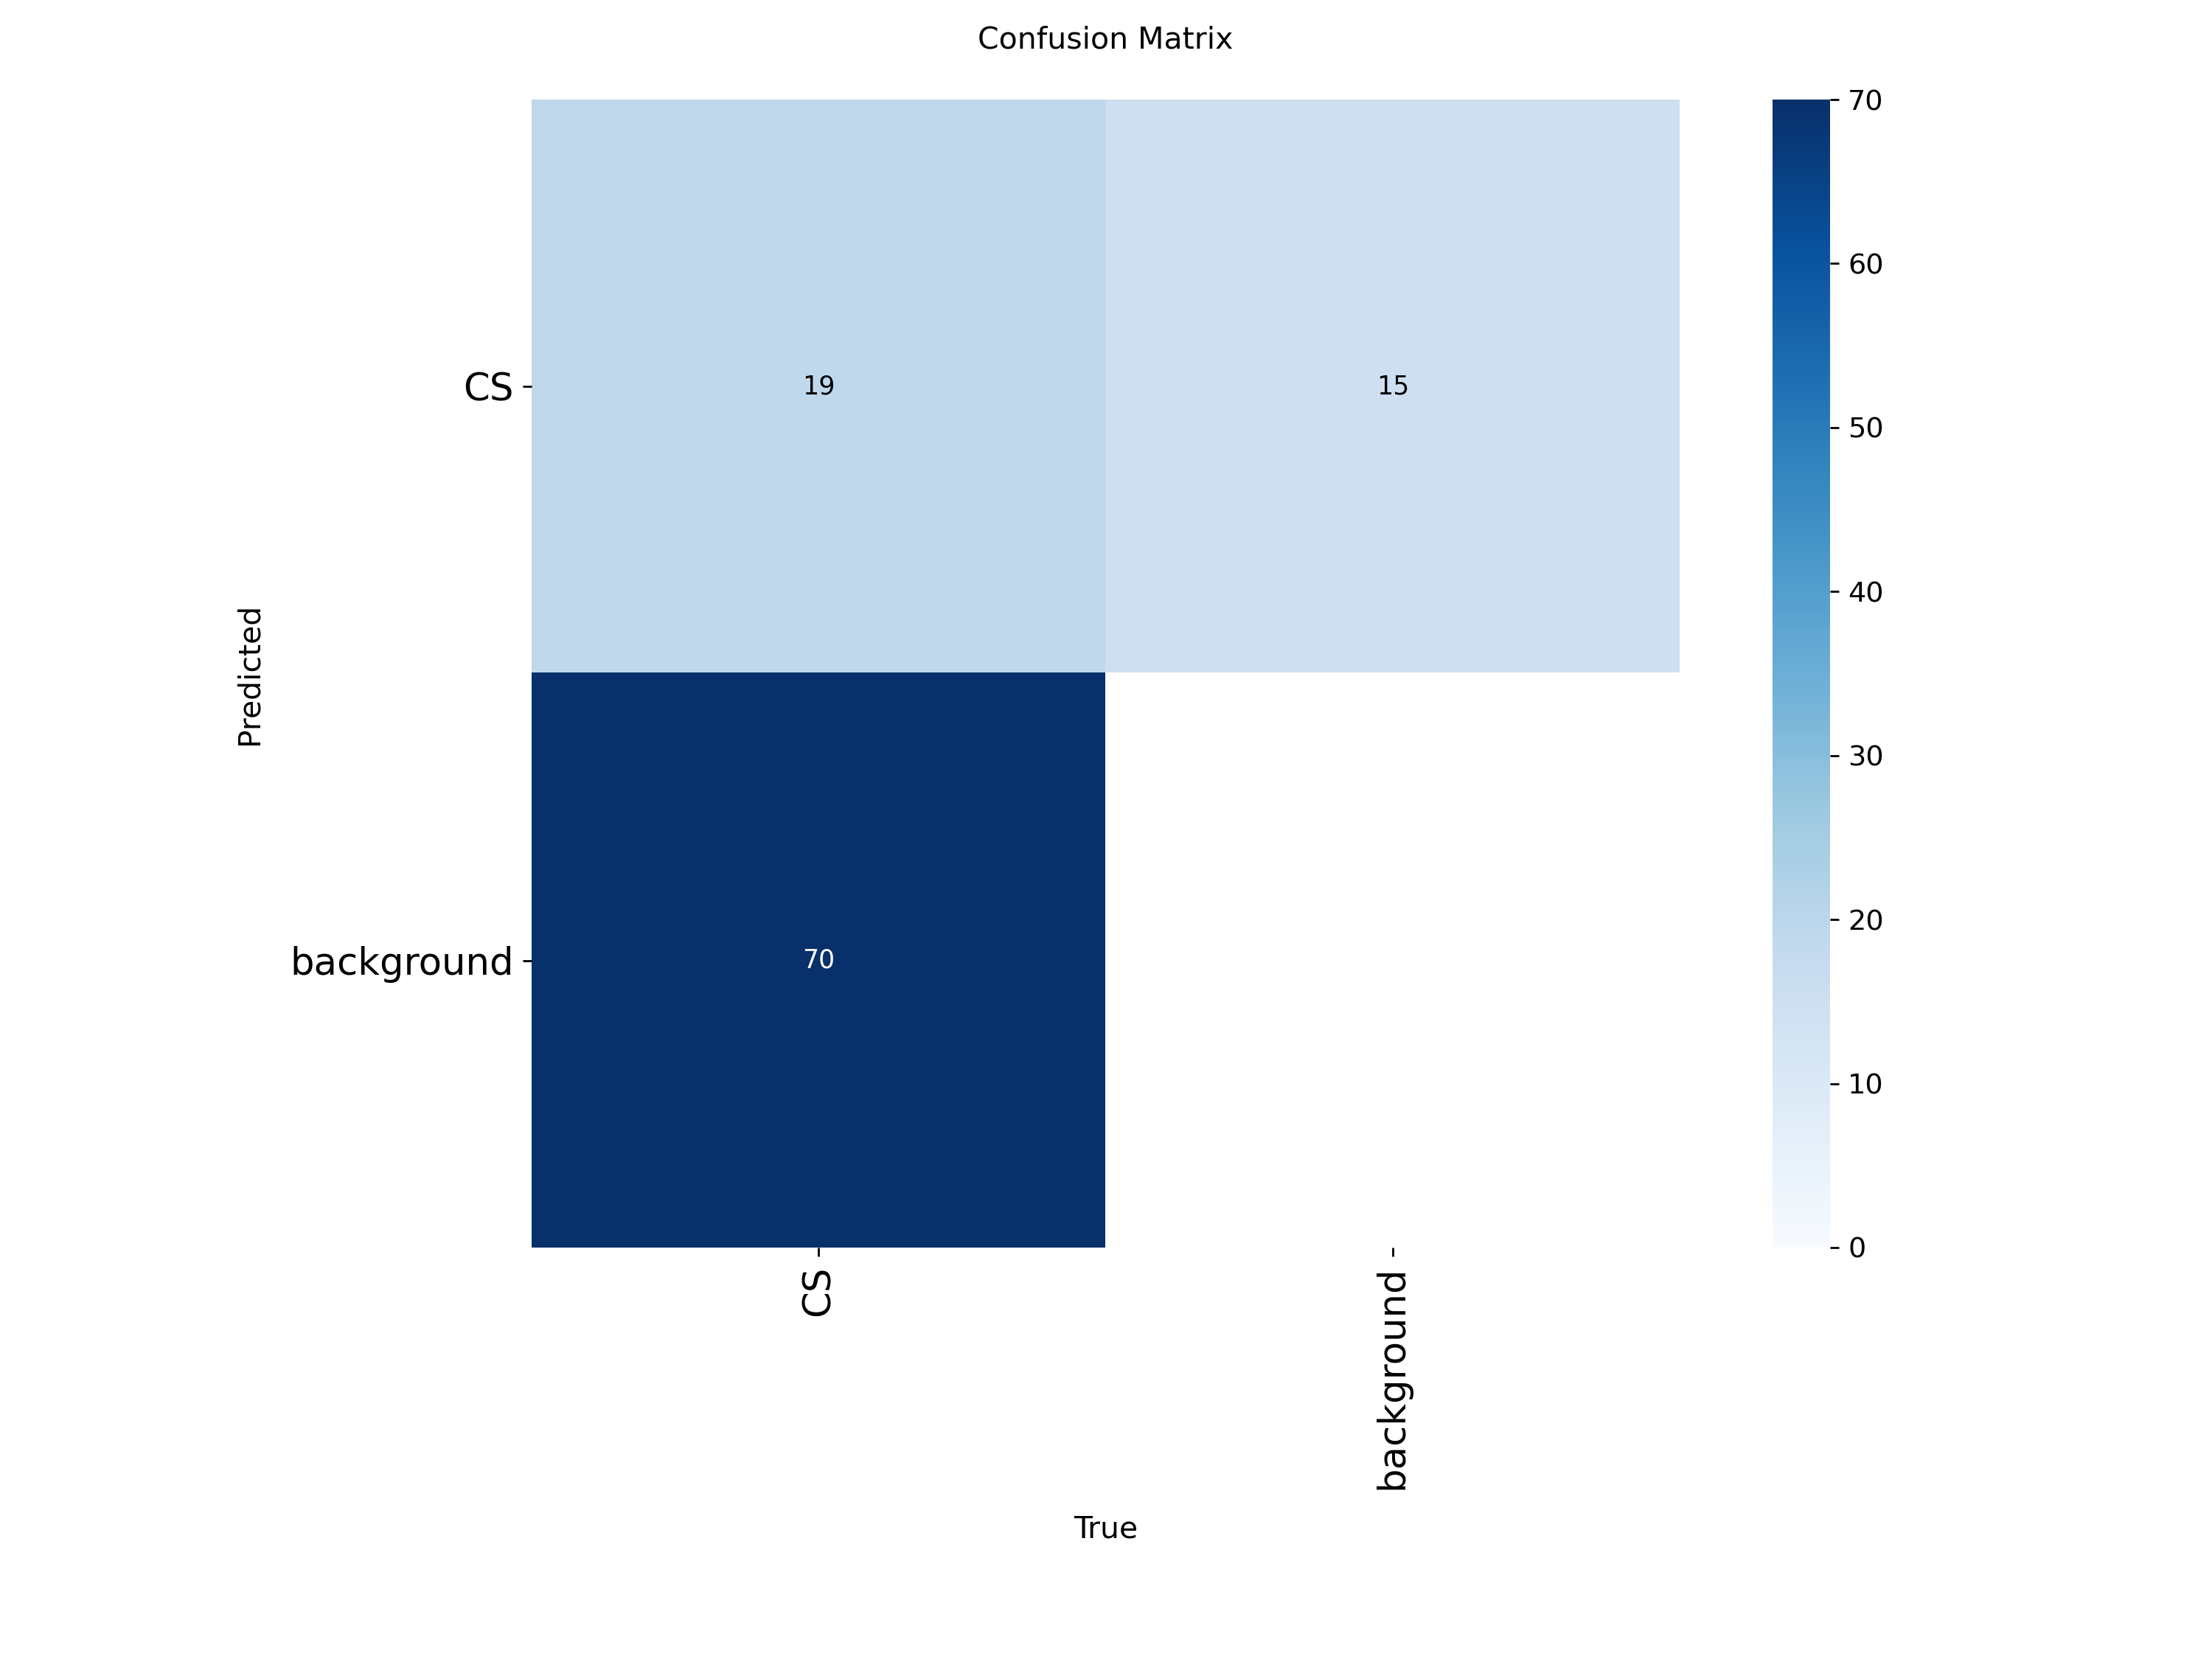

In [2]:
from IPython.display import Image

Image(filename=f'runs/detect/train/confusion_matrix.png', width=1000)

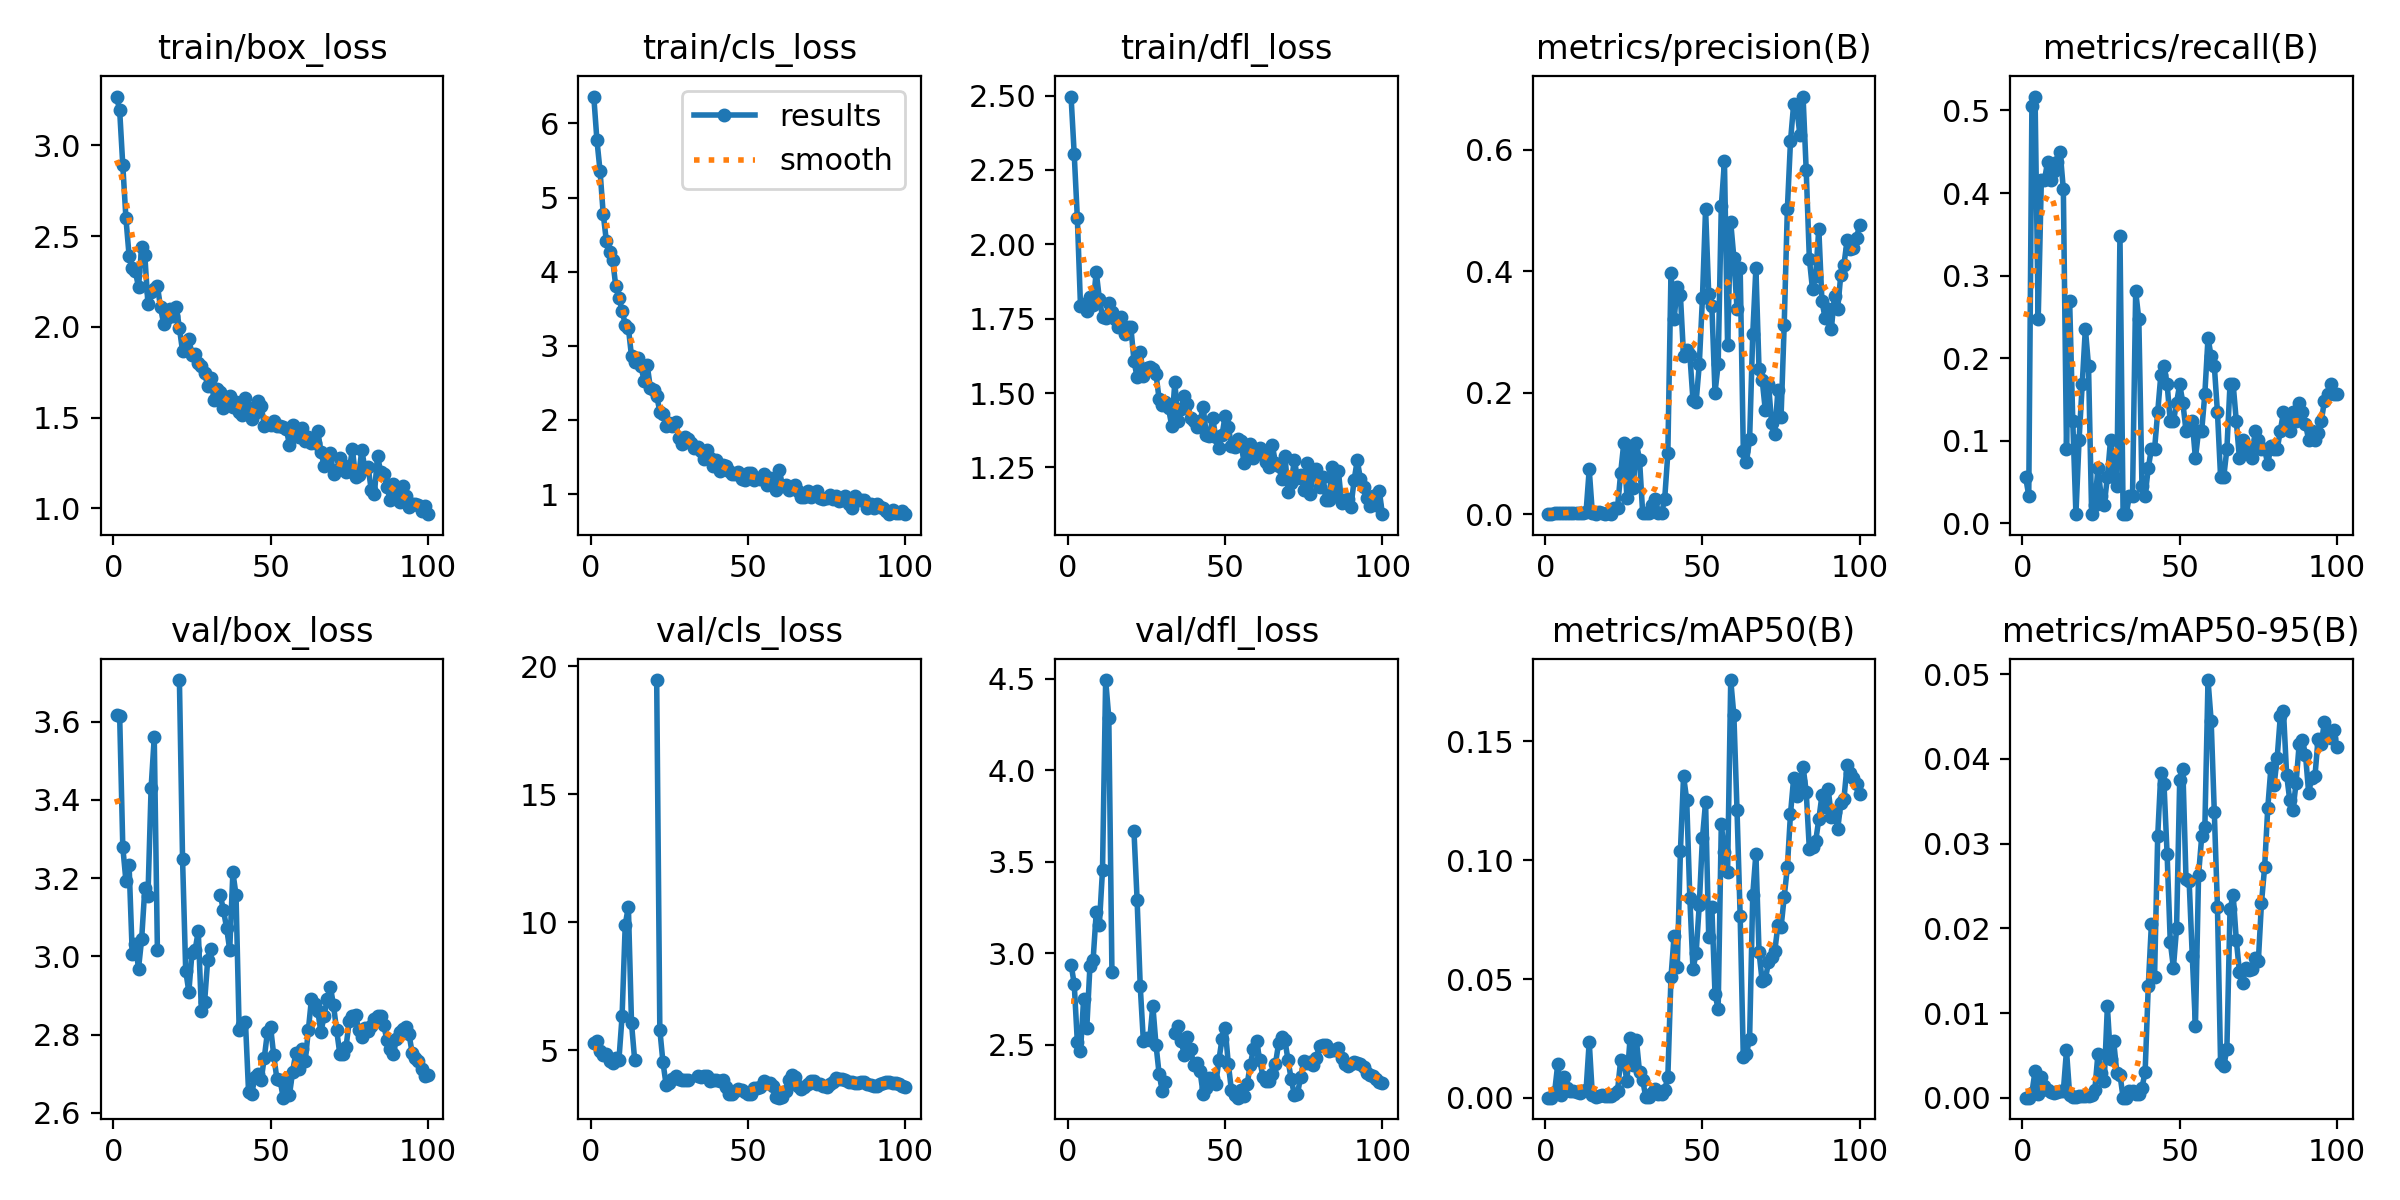

In [3]:

from IPython.display import Image

Image(filename=f'runs/detect/train/results.png', width=1000)

In [4]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"yolo_export/test/images",
    annotations_directory_path=f"yolo_export/test/labels",
    data_yaml_path=f"data.yaml"
)

ds.classes

['CS']

In [5]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [6]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.03620068768010404
mAP 50 0.13524392925122472
mAP 75 0.002376237623762376


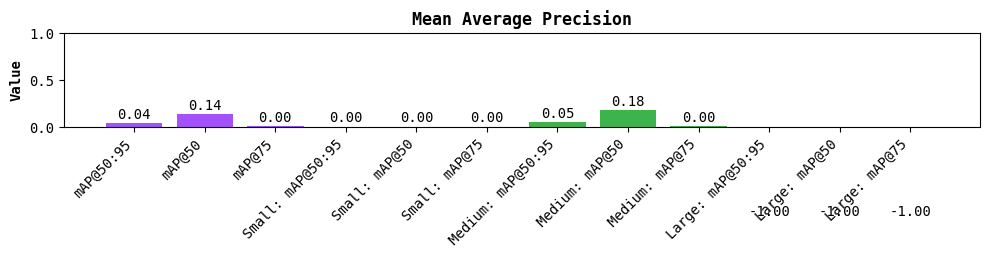

In [7]:
%matplotlib inline

map.plot()

In [8]:
import supervision as sv

model = YOLO(f'runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"yolo_export/test/images",
    annotations_directory_path=f"yolo_export/test/labels",
    data_yaml_path=f"data.yaml"
)
     

In [9]:
len(ds)

56

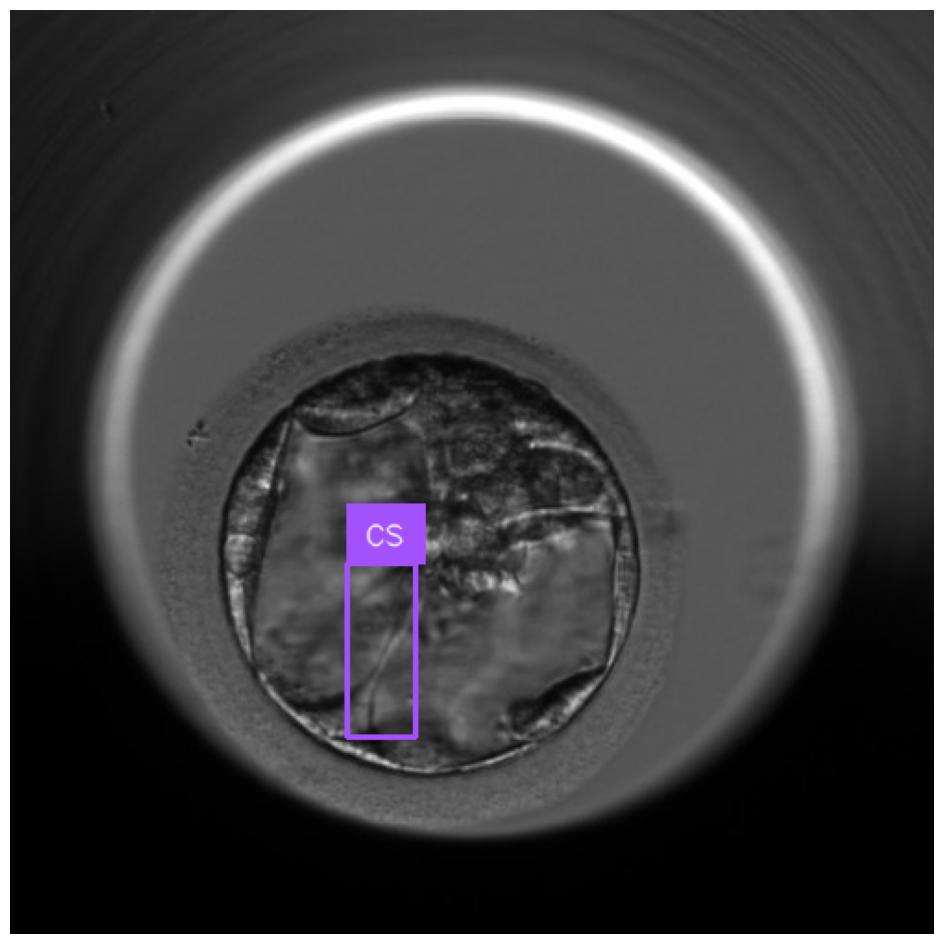

In [11]:

import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

# results = model(image, verbose=False, conf=0.03)[0]
results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)